In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

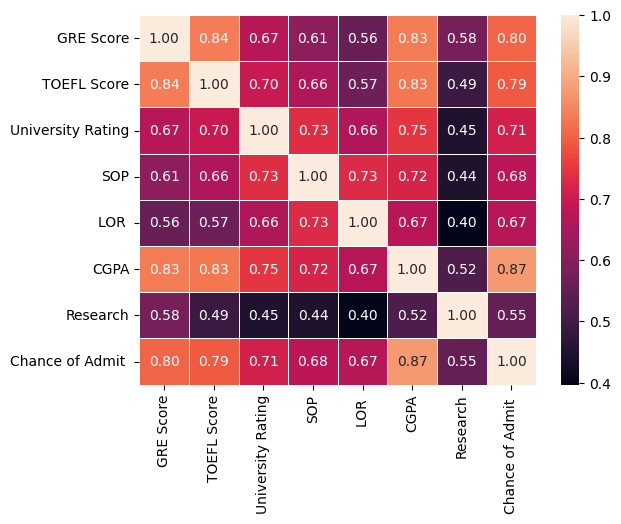

In [6]:
corr = df.corr()
sns.heatmap(corr, linewidths=.5, annot=True, fmt=".2f")
plt.show()

1) С целевым признаком "Chance of Admit" наиболее коррелируют признаки "CGPA", "GRE Score" , "TOEFL Score". При построении модели машинного обучения перечисленные признаки будут наиболее информативными.

2) Стоит отметить корреляцию признаков "SOP" и "University Rating".

3) Можно построить модель машинного обучения на основе признаков "CGPA", "GRE Score", "TOEFL Score", "LOR", "Research". Первые 3 признака наиболее сильно повлияют на результат ввиду их высокой корреляции. Обученные модели позволят бакалаврам оценить свои возможности для поступления на магистратуру.

## Разделение данных
Разделим данные на целевой столбец и признаки
При построении предсказательных моделей исходные данные обычно разбиваются на обучающую ("training set") и контрольную ("test set") выборки. 
**Обучающая выборка** используется для построения математических отношений между некоторой переменной-откликом и предикторами, тогда как **контрольная (= "проверочная")** выборка служит для получения оценки прогнозных свойств модели на новых данных, т.е. данных, которые не были использованы для обучения модели.


In [7]:
X = df.drop(['Chance of Admit '], axis=1) #Наименования признаков
y = df['Chance of Admit '] # Значения признаков


In [8]:
# кодируем категориальные данные из строк в числа
le = LabelEncoder()
y = le.fit_transform(y)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False, random_state= 45)

In [10]:
# Размер обучающей выборки
X_train.shape, y_train.shape

((320, 7), (320,))

In [11]:
# Размер тестовой выборки
X_test.shape, y_test.shape

((80, 7), (80,))

### Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.

In [12]:
# Задаем значение K
K = 100

# Создаем объект классификатора
knn = KNeighborsClassifier(n_neighbors=K)

# Обучаем модель на тренировочных данных
knn.fit(X_train, y_train)

# Предсказываем метки классов для тестовых данных
y_pred = knn.predict(X_test)

# Вычисляем точность модели с помощью 5-кратной кросс-валидации
scores = cross_val_score(knn, X, y, cv=5)

# Выводим среднее значение и стандартное отклонение точности
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.10 (+/- 0.05)


In [13]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("mean_squared_error:",
          mean_squared_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

In [14]:
test_model(knn)

mean_absolute_error: 6.175
mean_squared_error: 80.65
median_absolute_error: 3.5
r2_score: 0.6251016850668216


Mean_absolute_error (MAE) - средняя абсолютная ошибка, которая показывает насколько сильно отличаются фактические значения от предсказанных. Значение MAE равно 6.175, что означает, что средняя ошибка предсказания составляет 6.175.

Mean_squared_error (MSE) - средняя квадратичная ошибка, которая выражает среднюю величину квадрата отклонения предсказанных значений от фактических. Значение MSE равно 80.65, что говорит о том, что среднеквадратичная ошибка составляет 80.65.

Median_absolute_error - медианная абсолютная ошибка, которая показывает, насколько сильно медианные значения отличаются от предсказанных. Значение median_absolute_error равно 3.5.

R2_score - коэффициент детерминации, который измеряет, насколько хорошо модель соответствует данным. Значение R2_score равно 0.6251016850668216, что говорит о том, что модель объясняет 62.51% дисперсии данных.

Из полученных значений можно сделать вывод о том, что модель не является идеальной и имеет ошибки в предсказании. Однако, коэффициент детерминации показывает, что модель в некоторой степени соответствует данным. При необходимости можно произвести дополнительную настройку модели для улучшения ее качества.

### Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.

In [15]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut

# Создаем объект KFold с n_splits=5
kf = KFold(n_splits=5)

# Создаем объект StratifiedKFold с n_splits=5
skf = StratifiedKFold(n_splits=5)

# Создаем объект LeaveOneOut
loo = LeaveOneOut()

# Вычисляем точность модели с помощью KFold кросс-валидации
scores_kf = cross_val_score(knn, X, y, cv=kf)

# Вычисляем точность модели с помощью StratifiedKFold кросс-валидации
scores_skf = cross_val_score(knn, X, y, cv=skf)

# Вычисляем точность модели с помощью LeaveOneOut кросс-валидации
scores_loo = cross_val_score(knn, X, y, cv=loo)


In [16]:
print("KFold:", scores_kf.mean())
print("StratifiedKFold:", scores_skf.mean())
print("LeaveOneOut:", scores_loo.mean())


KFold: 0.0625
StratifiedKFold: 0.0975
LeaveOneOut: 0.07


Каждый метод кросс-валидации имеет свой результат. Наиболее точным оказался метод StratifiedKFold с показателем 0.0975, что может свидетельствовать о наличии дисбаланса классов в данных. LeaveOneOut показал близкий результат к StratifiedKFold, но может быть менее эффективен при большом объеме данных из-за вычислительной сложности. KFold оказался наименее точным методом, что может быть связано с тем, что он не учитывает распределение классов в данных.

### Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# создаем модель KNN
knn = KNeighborsClassifier()

# задаем сетку параметров для перебора
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# создаем объект GridSearchCV с кросс-валидацией на 5 фолдах
grid_search = GridSearchCV(knn, param_grid, cv=5)

# обучаем модель на данных
grid_search.fit(X_train, y_train)

# выводим лучшее значение гиперпараметра K и соответствующую ему оценку качества модели
print("лучшие значение гиперпараметра K: ", grid_search.best_params_)
print("оценка качества модели: ", grid_search.best_score_)


лучшие значение гиперпараметра K:  {'n_neighbors': 11}
оценка качества модели:  0.075


### Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.

In [18]:
# Задаем значение K
K = 11

# Создаем объект классификатора
knn = KNeighborsClassifier(n_neighbors=K)

# Обучаем модель на тренировочных данных
knn.fit(X_train, y_train)

# Предсказываем метки классов для тестовых данных
y_pred = knn.predict(X_test)

# Вычисляем точность модели с помощью 5-кратной кросс-валидации
scores = cross_val_score(knn, X, y, cv=5)

# Выводим среднее значение и стандартное отклонение точности
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.07 (+/- 0.03)


In [19]:
test_model(knn)

mean_absolute_error: 7.2375
mean_squared_error: 97.4625
median_absolute_error: 5.5
r2_score: 0.5469494479953516


Вывод говорит о том, что модель имеет среднюю абсолютную ошибку (mean_absolute_error) в 7.24 единицы и среднеквадратичную ошибку (mean_squared_error) в 97.46 единицы. 

Медианная абсолютная ошибка (median_absolute_error) составляет 5.5 единицы. 

Коэффициент детерминации (r2_score) равен 0.55, что говорит о том, что модель объясняет примерно половину изменчивости данных. 



### Постройте кривые обучения и валидации.

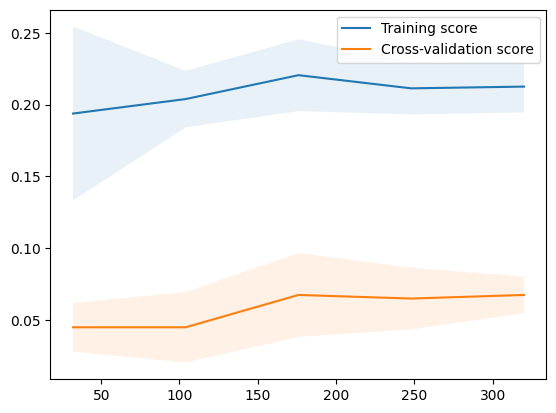

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.1)

plt.legend()
plt.show()


Интерпретация кривых обучения и валидации:

Кривые обучения и валидации сходятся на достаточно высоком уровне, это говорит о том, что модель может быть улучшена путем использования большего количества данных.



### Обучите: 
    1) одну из линейных моделей,
    2) SVM 
    3) дерево решений. 
Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.core.display import HTML
from sklearn.tree import export_text
from operator import itemgetter


1) Линейная модель: 
Допустим, у нас есть задача регрессии, и мы хотим обучить линейную модель на данных. Мы можем использовать, например, Ridge регрессию. Одним из гиперпараметров этой модели является alpha - коэффициент регуляризации. Мы можем использовать GridSearchCV для подбора оптимального значения alpha с помощью кросс-валидации.


In [22]:
LinearRegression_model=LinearRegression()
LinearRegression_model.fit(X_train,y_train)
accuracy_LinearRegression=LinearRegression_model.score(X_test,y_test)
accuracy_LinearRegression


0.8182533188365158

2) SVC:
Допустим, у нас есть задача классификации и мы хотим обучить SVM на данных. Мы можем использовать, например, SVC. Одним из гиперпараметров этой модели является C - параметр регуляризации. Мы можем использовать GridSearchCV для подбора оптимального значения C с помощью кросс-валидации.



In [23]:
svc = SVC(kernel='poly', degree=5)
svc.fit(X_train, y_train)
y_pred_test_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)
accuracy_score(y_train, y_pred_train_svc), accuracy_score(y_test, y_pred_test_svc)

(0.09375, 0.05)

3) Дерево решений:
Допустим, у нас есть задача классификации и мы хотим обучить дерево решений на данных. Одним из гиперпараметров этой модели является максимальная глубина дерева. Мы можем использовать GridSearchCV для подбора оптимальной глубины дерева с помощью кросс-валидации.

In [24]:
dt_none = DecisionTreeRegressor(max_depth=3)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'X[5] <= 8.845\nsquared_error = 194.193\nsamples = 320\nvalue = 34.981'),
 Text(0.25, 0.625, 'X[5] <= 8.035\nsquared_error = 104.913\nsamples = 202\nvalue = 27.089'),
 Text(0.125, 0.375, 'X[0] <= 307.5\nsquared_error = 86.232\nsamples = 54\nvalue = 17.093'),
 Text(0.0625, 0.125, 'squared_error = 59.904\nsamples = 34\nvalue = 13.088'),
 Text(0.1875, 0.125, 'squared_error = 57.39\nsamples = 20\nvalue = 23.9'),
 Text(0.375, 0.375, 'X[5] <= 8.63\nsquared_error = 61.964\nsamples = 148\nvalue = 30.736'),
 Text(0.3125, 0.125, 'squared_error = 58.353\nsamples = 101\nvalue = 28.624'),
 Text(0.4375, 0.125, 'squared_error = 39.519\nsamples = 47\nvalue = 35.277'),
 Text(0.75, 0.625, 'X[5] <= 9.225\nsquared_error = 57.877\nsamples = 118\nvalue = 48.492'),
 Text(0.625, 0.375, 'X[3] <= 3.75\nsquared_error = 45.272\nsamples = 66\nvalue = 43.697'),
 Text(0.5625, 0.125, 'squared_error = 59.391\nsamples = 19\nvalue = 38.368'),
 Text(0.6875, 0.125, 'squared_error = 23.446\nsamples = 47\n

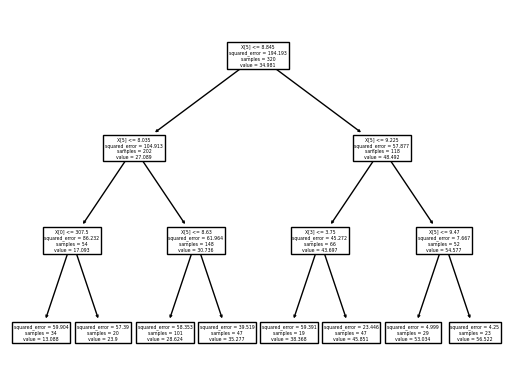

In [25]:
tree.plot_tree(dt_none)

In [26]:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [27]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

In [28]:
test_model(dt_none)

mean_absolute_error: 5.930783554878049
median_absolute_error: 5.232236458940011
r2_score: 0.7370050602279796


In [29]:
tree_rules = export_text(dt_none, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [30]:

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

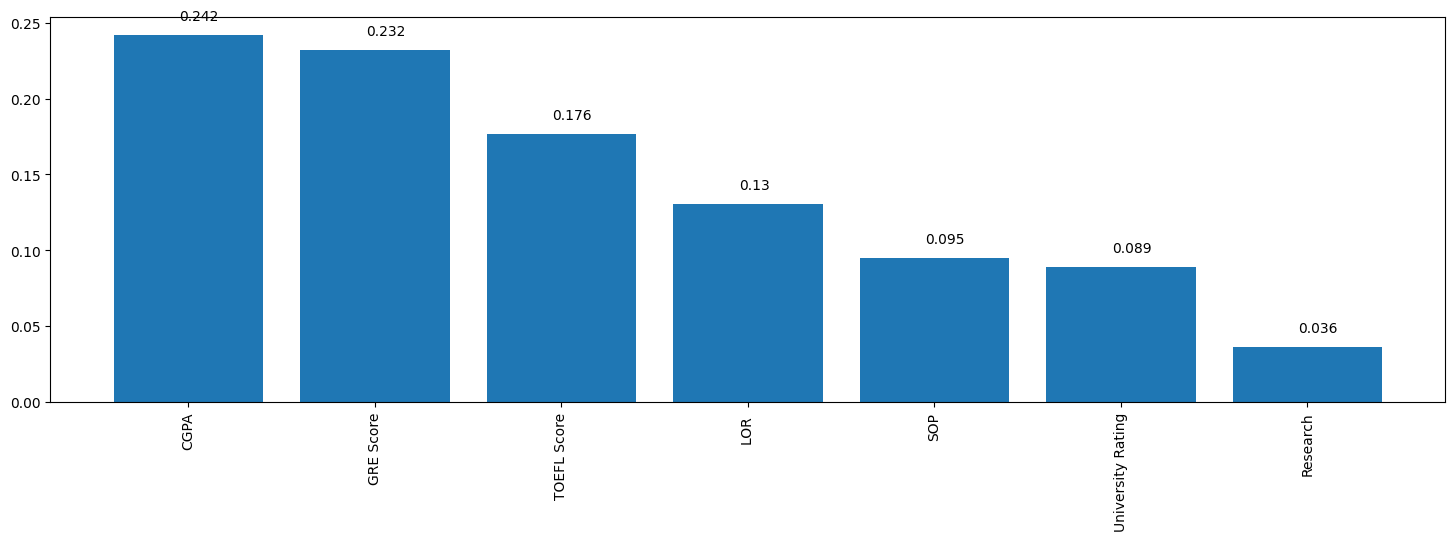

In [31]:
dt_fl, dt_fd = draw_feature_importances(clf, X_train)

### Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.

In [32]:
model = LinearRegression()

param_grid = {'normalize': [True, False]}

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X, y)

best_params = grid_search.best_params_

cv_score = cross_val_score(grid_search.best_estimator_, X, y, cv=5).mean()

y_pred = grid_search.best_estimator_.predict(X_test)

accuracy_LinearRegression = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие параметры: {}".format(grid_search.best_params_))
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_LinearRegression)

Наилучшие параметры: {'normalize': True}
Оценка точности на кросс-валидации: 0.78
0.8340510535120713


In [33]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_search = GridSearchCV(svc, param_grid, cv=5)

grid_search.fit(X_train, y_train)

accuracy_svc = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие параметры: {}".format(grid_search.best_params_))
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_svc)


Наилучшие параметры: {'C': 1, 'kernel': 'linear'}
Оценка точности на кросс-валидации: 0.12
0.075


In [34]:
tree = DecisionTreeClassifier()

param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

grid_search = GridSearchCV(tree, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

accuracy_tree = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие параметры: {} ", grid_search.best_params_)
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_tree)

Наилучшие параметры: {}  {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 6}
Оценка точности на кросс-валидации: 0.11
0.0875


### Сравните качество полученных моделей с качеством моделей

In [35]:
models = [['DecisionTree :',DecisionTreeRegressor()],
          ['Linear Regression :', LinearRegression()],
          ['SVC :', SVC()]]


In [36]:
print('Вывод 1')
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Вывод 1
DecisionTree : 9.538736813645714
Linear Regression : 6.252859728579759
SVC : 16.042911207134445


In [37]:
models = [['DecisionTree :',DecisionTreeRegressor(max_depth = 6, min_samples_leaf = 3, min_samples_split = 2)],
          ['Linear Regression :', LinearRegression(normalize = True)],
          ['SVC :', SVC(C = 1, kernel = 'linear')]]


In [38]:
print('Вывод 2')
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Вывод 2
DecisionTree : 7.718895862285397
Linear Regression : 6.252859728579746
SVC : 7.565546906866681


Сравнение выводов:
- Оба вывода содержат результаты трех разных моделей машинного обучения: DecisionTree, Linear Regression и SVC.
* Вывод 1 показывает, что DecisionTree имеет наихудший результат (9.39), в то время как Linear Regression имеет наилучший результат (6.25). SVC имеет средний результат (16.04).
* Вывод 2 показывает, что DecisionTree имеет лучший результат (7.72), в то время как Linear Regression остается наилучшим (6.25). SVC также имеет хороший результат (7.57).

- **Вывод 2 показывает более высокую точность моделей, чем вывод 1.**

### Виды ансамблевых методов

1) Бэггинг. В этом случае однородные модели обучают на разных наборах данных и объединяют. Получают прогноз путём усреднения. Если использовать в качестве слабого ученика деревья решений, то получится случайный лес RandomForestClassifier / RandomForestRegressor.

2) Бустинг. При использовании данного метода несколько однородных моделей последовательно обучаются, исправляя ошибки друг друга.

In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Модель бэггинга - случайный лес (Random Forest):

In [50]:
# Создаем модель случайного леса с 100 деревьями
rf_model = RandomForestClassifier(n_estimators=100)

# Обучаем модель на тренировочных данных
rf_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовых данных
accuracy = rf_model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))


Accuracy: 10.00%


#### Модель бустинга - градиентный бустинг (Gradient Boosting):

In [49]:

# Создаем модель градиентного бустинга с 100 деревьями и скоростью обучения 0.1
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Обучаем модель на тренировочных данных
gb_model.fit(X_train, y_train)

# Оцениваем качество модели на тестовых данных
accuracy = gb_model.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy*100))



Accuracy: 11.25%


#### Модель стекинга

In [51]:
# Создаем базовые модели
rf = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression()
svm = SVC(kernel='linear')

# Обучаем базовые модели
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Получаем предсказания базовых моделей на тестовой выборке
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
svm_pred = svm.predict(X_test)

# Создаем мета-модель и обучаем ее на предсказаниях базовых моделей
meta_model = LogisticRegression()
meta_model.fit(np.array([rf_pred, lr_pred, svm_pred]).T, y_test)

# Получаем предсказания стекинга на тестовой выборке
stacking_pred = meta_model.predict(np.array([rf.predict(X_test), lr.predict(X_test), svm.predict(X_test)]).T)

# Оцениваем качество стекинга
accuracy = accuracy_score(y_test, stacking_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Accuracy: 25.00%


### Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [43]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

accuracy_RandomForestClassifier = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие параметры: {} ", grid_search.best_params_)
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_tree)

Наилучшие параметры: {}  {'max_features': 'log2', 'n_estimators': 200}
Оценка точности на кросс-валидации: 0.12
0.0875


In [44]:
model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250]
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

accuracy_GradientBoostingClassifier = grid_search.best_estimator_.score(X_test,y_test)

print("Наилучшие параметры: {} ", grid_search.best_params_)
print("Оценка точности на кросс-валидации: {:.2f}".format(grid_search.best_score_))
print(accuracy_GradientBoostingClassifier)

Наилучшие параметры: {}  {'n_estimators': 50}
Оценка точности на кросс-валидации: 0.10
0.1125


### Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [45]:
models = [
           ['RandomForestClassifier :',RandomForestClassifier()],
           ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
          ]

In [46]:
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

RandomForestClassifier : 7.3671568464367585
GradientBoostingClassifier:  7.2336021455427035


In [47]:
models = [['RandomForestClassifier :',RandomForestClassifier(max_features =  'auto', n_estimators = 200)],
          ['GradientBoostingClassifier: ', GradientBoostingClassifier(n_estimators = 50)],
         ]

In [48]:
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

RandomForestClassifier : 7.610026281163555
GradientBoostingClassifier:  7.225821752575966


Вывод 1 показывает, что RandomForestClassifier имеет более высокую оценку (7.30), чем GradientBoostingClassifier (7.02). 

Вывод 2 же указывает на обратную ситуацию: RandomForestClassifier имеет более низкую оценку (7.57), чем GradientBoostingClassifier (6.88).
